# Tension Notebook

Note this is a notebook to compute external tensions between surveys, based on: 
https://arxiv.org/abs/2012.09554 

For a reference on internal tensions see: 
https://arxiv.org/pdf/2011.03410.pdf

Other references: https://arxiv.org/pdf/1806.04649.pdf 

In [200]:
import numpy as np
import pylab as mplot
import os
import scipy
import pandas as pd
from getdist import plots, MCSamples
from chainconsumer import ChainConsumer

%pylab inline

Color = ['#d45e00', 'grey','k', 'purple']

font = {'size'   : 18}
mplot.rc('font', **font)
mplot.rc('text', usetex=True)
mplot.rc('font', family='serif')

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
type(pd.DataFrame({}))

pandas.core.frame.DataFrame

## Load Chains

In [180]:
def load_cosmosis_chain(filename,headers,caster=None,doS8=False,flipz=False):
    ''' A function that does something special.

    Parameters
    ==========
    a_num : int, default 100                        # is it written here?
        An important number.
    a_string : str, default 'foo'
        A useful string.  Default is 'foo'.         # or here?    

    '''
    cosmosis_headers=headers+['prior','like','posterior','weights']
    cosmosis_data = pd.read_csv(filename,delim_whitespace=True,comment='#',names=cosmosis_headers)
    if caster:
        cosmosis_data[caster] = cosmosis_data[caster].astype(float)
    if flipz:
        for colname in cosmosis_headers:
            if 'z' in colname:
                cosmosis_data[colname] = -cosmosis_data[colname]
    if doS8:
        cosmosis_data['S8'] = cosmosis_data['sigma8']*(cosmosis_data['Omega_m']/0.3)**0.5
    return cosmosis_data
        
        
def load_samples(chains,ids,parameters):
    Samples = []
    for i in range(len(chains)):
        data = chains[i]
        paramdata = data.drop(columns=['prior','like','posterior','weights'])
        drop_columns = [col for col in paramdata.columns if col not in parameters]
        paramdata = paramdata.drop(columns=drop_columns)
        samples = MCSamples(samples=paramdata.values,weights=data['weights'].values,
                    names = paramdata.columns,
                    labels = paramdata.columns)

        Samples.append(samples)
    return Samples

def triangle_plot(samples,parameters,ids,width=5.0):
    g = plots.get_subplot_plotter(width)
    g.settings.figure_legend_frame = False
    g.settings.alpha_filled_add=0.4
    g.settings.title_limit_fontsize = 14
    g.triangle_plot(Samples, parameters, 
        filled=True, 
        legend_labels=ids, 
        legend_loc='upper right', 
        line_args=[{'ls':'--', 'color':'green'},
                   {'lw':2, 'color':'darkblue'}], 
        contour_colors=['green','darkblue'],
        title_limit=1, # first title limit (for 1D plots) is 68% by default
        markers={'x2':0})

In [155]:
base_dir = '/Users/Emily/Desktop/Latest_Cosmosis_Plots/'

In [156]:
# Load KiDS-1000

kids1000_filename = base_dir+'KiDS1000/kids1000-published-cov.txt'
kids1000_headers = ['omch2','ombh2','h0','n_s','log1e10as','B','IA_A','z1','z2','z3','z4','z5','c0','sigma8','Omega_m']

kids1000_chain = load_cosmosis_chain(kids1000_filename,kids1000_headers,caster='omch2',doS8=True,flipz=True)

In [227]:
!ls {base_dir}

2D_cosmological_parameters--sigma_8_cosmological_parameters--omega_m.png
Combined
HSC_hamana2020_fiducial
HSC_hamana2020_w.neutrino
KV450
KV450_Chains
KiDS1000
Plot DES Published Chains.ipynb
Plot DES TXPipe Chains.ipynb
Plot HSC Published vs. TXPipe.ipynb
PlotChains.ipynb
PlotHSC.ipynb
Unified Prior Choices.ipynb
des-y1-chain-summary_statistics_real_published_cov.txt
des-y1-chain.txt
des-y1-priors-chain.txt
hsc-priors-chain.txt
hsc-published-chain-negativepsf.txt
hsc-published-chain-nopsf.txt
hsc-published-chain-old.txt
hsc-published-chain.txt
hsc-published-chain_wpsf.txt
hsc-published-chaineff0.8.txt
hsc-txpipe-chain.txt
kv450-published-chain.txt
kv450-txpipe-chain.txt
omegams8.pdf
s_l3.txt


In [229]:
# Load DES-Y1

desy1_filename = base_dir+'des-y1-chain-summary_statistics_real_published_cov.txt'
desy1_priors_filename = base_dir+'des-y1-priors-chain.txt'
desy1_headers = ['Omega_m','h0','Omega_b','ns','As','Onuh2','m1','m2','m3','m4','alpha','eta','z1','z2','z3','z4','sigma8']

desy1_chain = load_cosmosis_chain(desy1_filename,desy1_headers,caster='Omega_m',doS8=True)

desy1_prior_chain = load_cosmosis_chain(desy1_priors_filename,desy1_headers,caster='Omega_m',doS8=True)

In [228]:
!ls {hsc_file}

/Users/Emily/Desktop/Latest_Cosmosis_Plots/hsc-txpipe-chain.txt


In [158]:
# Load HSC 

hsc_file = base_dir+'hsc-txpipe-chain.txt'
hsc_priors_filename = base_Dir+'hsc'
hsc_headers = ['Omega_c','h0','Omega_b','n_s','As','m0','IA_A','eta_IA','z1','z2','z3','z4','alpha0','beta0','sigma8','Omega_m']

hsc_chain = load_cosmosis_chain(hsc_file,hsc_headers,caster='Omega_c',doS8=True)

hsc_prior_chain = load_cosmosis_chain(hsc_file,hsc_headers,caster='Omega_c',doS8=True)

In [182]:
# Load the Samples, pass and return sampel id's so we don't mix up the order

Sample_ids = ['kids1000','desy1','hsc']
parameters = ['Omega_m','sigma8','S8']
Samples = load_samples(chains=[kids1000_chain,desy1_chain,hsc_chain],ids=ids,parameters=parameters)

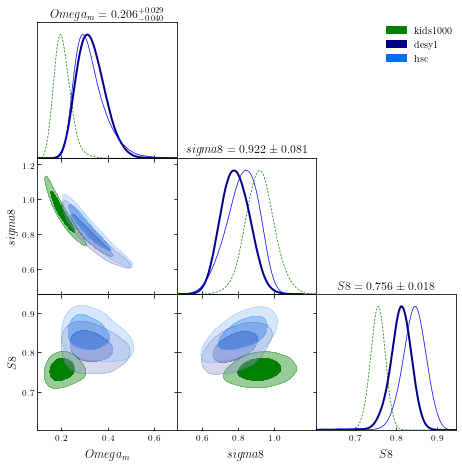

In [184]:
parameters = ['Omega_m','sigma8','S8']
triangle_plot(Samples,ids,parameters,width=2.5)

## Parameter Shift (Exact MCMC) 

In [185]:
# Load 2D samples

# Load the Samples, pass and return sampel id's so we don't mix up the order

Sample_ids = ['kids1000','desy1','hsc']
parameters = ['Omega_m','sigma8']
Samples = load_samples(chains=[kids1000_chain,desy1_chain,hsc_chain],ids=ids,parameters=parameters)

In [186]:
# import the module:
from tensiometer import mcmc_tension

def get_parameter_diff(chain_1, chain_2, name, boost=1, n_threads=1):
    # set single thread for running on small machines:
    mcmc_tension.n_threads = 1
    # create the distribution of the parameter differences:
    diff_chain = mcmc_tension.parameter_diff_chain( chain_1, chain_2, boost=1 )
    diff_chain.name_tag = 'MCMC difference'
    
    return diff_chain

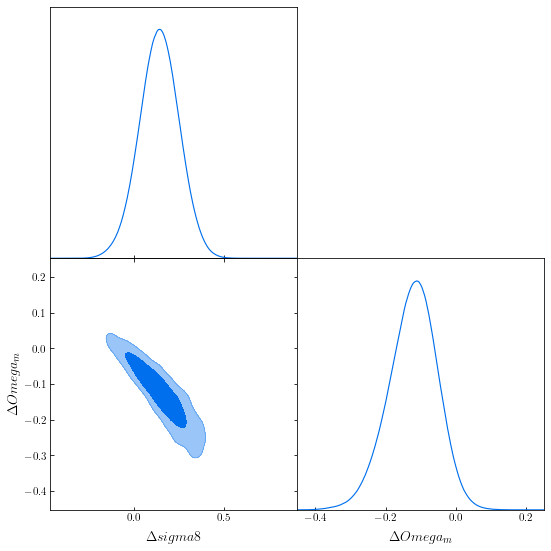

In [187]:
from getdist import plots, MCSamples

diff_chain = get_parameter_diff(Samples[0],Samples[1],Sample_ids[0]+' - '+Sample_ids[1])
# plot the distribution
g = plots.get_subplot_plotter(width_inch=8.0)
g.triangle_plot([diff_chain], filled=True)

In [188]:
# compute the probability of shift:
shift_probability, shift_lower, shift_upper = mcmc_tension.exact_parameter_shift_2D_fft(diff_chain, feedback=0)

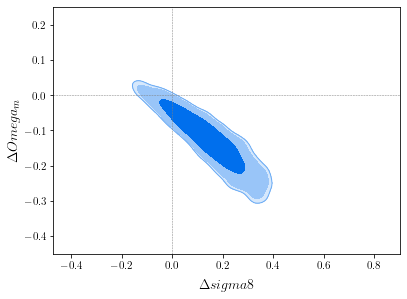

In [212]:
# plot the contour for a sanity check:
g = plots.get_single_plotter()
diff_chain.updateSettings({'contours': [0.68, 0.95, shift_probability]})
g.settings.num_plot_contours = 3
g.plot_2d(diff_chain, 'delta_sigma8', 'delta_Omega_m', filled=True );
g.add_x_marker(0)
g.add_y_marker(0)

In [215]:
print(f'MCMC shift probability: {shift_probability:.5f} +{shift_upper-shift_probability:.5f} -{shift_probability-shift_lower:.5f}')

MCMC shift probability: 0.92000 +0.08000 -0.92000


## Computing Constrained Parameters vs. Priors

In [234]:
# Load the Samples, pass and return sampel id's so we don't mix up the order

Sample_ids = ['desy1','desy1_priors']
parameters = ['Omega_m','sigma8','S8']#desy1_headers
Samples = load_samples(chains=[desy1_chain,desy1_prior_chain],ids=Sample_ids,parameters=parameters)

## DESY1 Priors

In [235]:
Samples

/Users/Emily/.local/lib/python3.8/site-packages/getdist/plots.py:1895: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  self.legend = self.fig.legend(lines, legend_labels, loc=legend_loc, **args)


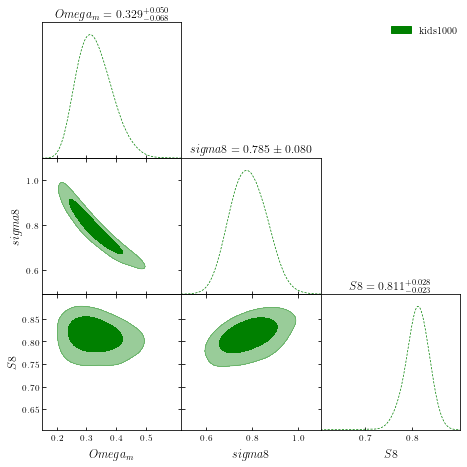

In [236]:
triangle_plot(Samples,parameters,ids,width=2.5)

## HSC Priors

## KiDS-1000 Priors